# Clipping Streets and Exporting as a GeoJSON

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import fiona
from fiona.crs import from_epsg

In [2]:
url = 'https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=GeoJSON'
boros = gpd.read_file(url)

boros = boros.to_crs(epsg=2263)
boros.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,5,Staten Island,1623631283.36,325924.002076,"MULTIPOLYGON (((970217.085 145643.397, 970227...."
1,2,Bronx,1187189499.3,463277.240478,"MULTIPOLYGON (((1012821.787 229228.479, 101278..."
2,1,Manhattan,636605816.437,359103.151368,"MULTIPOLYGON (((981219.022 188655.462, 980940...."
3,3,Brooklyn,1934169228.83,728478.125489,"MULTIPOLYGON (((1022227.393 152028.338, 102207..."
4,4,Queens,3041397430.33,888238.562635,"MULTIPOLYGON (((1032452.096 154469.461, 103245..."


<AxesSubplot:>

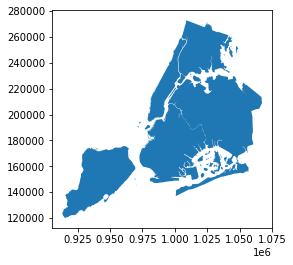

In [3]:
boros.plot()

In [4]:
url = 'https://data.cityofnewyork.us/api/geospatial/exjm-f27b?method=export&format=GeoJSON'
streets = gpd.read_file(url)

streets = streets.to_crs(epsg=2263)
streets.head()

,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,snow_pri,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry
0,1,50,None,42.0,10280,51,None,PL,1222601917,None,...,C,1,TW,None,BATTERY PL,3,BATTERY,2007-11-29,64,"MULTILINESTRING ((979278.595 196555.690, 97929..."
1,1,66,None,42.0,10280,65,None,PL,1222604562,None,...,C,1,TW,None,BATTERY PL,5,BATTERY,2007-11-29,82,"MULTILINESTRING ((979377.413 196797.951, 97950..."
2,1,84,None,42.0,10280,83,None,PL,1222600933,None,...,C,1,TW,None,BATTERY PL,6,BATTERY,2007-11-29,98,"MULTILINESTRING ((979503.289 197024.782, 97964..."
3,1,None,None,42.0,10280,None,None,PL,1222600931,None,...,C,1,TW,None,BATTERY PL,8,BATTERY,2007-11-29,None,"MULTILINESTRING ((979553.746 196059.826, 97952..."
4,1,None,None,24.0,10004,None,None,PL,212262395,None,...,C,1,TF,None,BATTERY PL,14,BATTERY,2011-04-22,None,"MULTILINESTRING ((980288.092 195963.182, 98026..."


In [5]:
streets.shape

(120830, 32)

<AxesSubplot:>

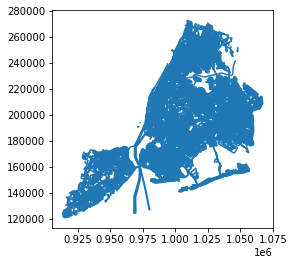

In [6]:
streets.plot()

In [7]:
streets.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 120830 entries, 0 to 120829
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   rw_type     120830 non-null  object        
 1   l_low_hn    84326 non-null   object        
 2   pre_direct  9987 non-null    object        
 3   st_width    120830 non-null  object        
 4   r_zip       119530 non-null  object        
 5   r_low_hn    84326 non-null   object        
 6   bike_lane   15198 non-null   object        
 7   post_type   107728 non-null  object        
 8   r_blkfc_id  120830 non-null  object        
 9   bike_trafd  15198 non-null   object        
 10  frm_lvl_co  120830 non-null  object        
 11  post_modif  734 non-null     object        
 12  pre_type    2873 non-null    object        
 13  full_stree  120830 non-null  object        
 14  l_blkfc_id  120830 non-null  object        
 15  shape_leng  120830 non-null  object        

In [8]:
streets['rw_type_name'] = streets['rw_type'].map(
    
{
'1':'Street',
'2':'Highway',
'3':'Bridge',
'4':'Tunnel',
'5':'Boardwalk',
'6':'Path/Trail',
'7':'StepStreet',
'8':'Driveway',
'9':'Ramp',
'10':'Alley',
'11':'Unknown',
'12':'Non-Physical Street Segment',
'13':'U Turn',
'14':'Ferry Route'
})

streets.head()

,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry,rw_type_name
0,1,50,None,42.0,10280,51,None,PL,1222601917,None,...,1,TW,None,BATTERY PL,3,BATTERY,2007-11-29,64,"MULTILINESTRING ((979278.595 196555.690, 97929...",Street
1,1,66,None,42.0,10280,65,None,PL,1222604562,None,...,1,TW,None,BATTERY PL,5,BATTERY,2007-11-29,82,"MULTILINESTRING ((979377.413 196797.951, 97950...",Street
2,1,84,None,42.0,10280,83,None,PL,1222600933,None,...,1,TW,None,BATTERY PL,6,BATTERY,2007-11-29,98,"MULTILINESTRING ((979503.289 197024.782, 97964...",Street
3,1,None,None,42.0,10280,None,None,PL,1222600931,None,...,1,TW,None,BATTERY PL,8,BATTERY,2007-11-29,None,"MULTILINESTRING ((979553.746 196059.826, 97952...",Street
4,1,None,None,24.0,10004,None,None,PL,212262395,None,...,1,TF,None,BATTERY PL,14,BATTERY,2011-04-22,None,"MULTILINESTRING ((980288.092 195963.182, 98026...",Street


In [9]:
streets['rw_type_name'].value_counts()

Street                         99344
Path/Trail                      5299
Highway                         4111
Alley                           3834
Ramp                            3558
Bridge                          2692
Driveway                         776
Ferry Route                      423
U Turn                           322
StepStreet                       191
Tunnel                           174
Boardwalk                        102
Non-Physical Street Segment        4
Name: rw_type_name, dtype: int64

In [10]:
streets = streets.loc[streets['rw_type'].isin(['1'])]

streets.head()

,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry,rw_type_name
0,1,50,None,42.0,10280,51,None,PL,1222601917,None,...,1,TW,None,BATTERY PL,3,BATTERY,2007-11-29,64,"MULTILINESTRING ((979278.595 196555.690, 97929...",Street
1,1,66,None,42.0,10280,65,None,PL,1222604562,None,...,1,TW,None,BATTERY PL,5,BATTERY,2007-11-29,82,"MULTILINESTRING ((979377.413 196797.951, 97950...",Street
2,1,84,None,42.0,10280,83,None,PL,1222600933,None,...,1,TW,None,BATTERY PL,6,BATTERY,2007-11-29,98,"MULTILINESTRING ((979503.289 197024.782, 97964...",Street
3,1,None,None,42.0,10280,None,None,PL,1222600931,None,...,1,TW,None,BATTERY PL,8,BATTERY,2007-11-29,None,"MULTILINESTRING ((979553.746 196059.826, 97952...",Street
4,1,None,None,24.0,10004,None,None,PL,212262395,None,...,1,TF,None,BATTERY PL,14,BATTERY,2011-04-22,None,"MULTILINESTRING ((980288.092 195963.182, 98026...",Street


In [11]:
streets['rw_type_name'].value_counts()

Street    99344
Name: rw_type_name, dtype: int64

<AxesSubplot:>

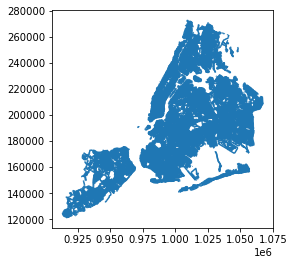

In [12]:
streets.plot()

In [13]:
streets.geom_type.value_counts()

MultiLineString    99344
dtype: int64

In [14]:
# clipping the streets that only fall within the boro shapes
streets_clipped = gpd.clip(streets, boros)

streets_clipped.geom_type.value_counts()

LineString            99245
MultiLineString          53
GeometryCollection       33
Point                     6
dtype: int64

In [15]:
streets_clipped = streets_clipped.loc[streets_clipped.geom_type == 'LineString']

streets_clipped.geom_type.value_counts()

LineString    99245
dtype: int64

In [16]:
# printing the columns of our dataframe
streets_clipped.columns

Index(['rw_type', 'l_low_hn', 'pre_direct', 'st_width', 'r_zip', 'r_low_hn',
       'bike_lane', 'post_type', 'r_blkfc_id', 'bike_trafd', 'frm_lvl_co',
       'post_modif', 'pre_type', 'full_stree', 'l_blkfc_id', 'shape_leng',
       'to_lvl_co', 'modified', 'status', 'post_direc', 'r_high_hn', 'l_zip',
       'snow_pri', 'borocode', 'trafdir', 'pre_modifi', 'st_label',
       'physicalid', 'st_name', 'created', 'l_high_hn', 'geometry',
       'rw_type_name'],
      dtype='object')

In [17]:
streets_clipped.iloc[:, 15:].head()

,shape_leng,to_lvl_co,modified,status,post_direc,r_high_hn,l_zip,snow_pri,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry,rw_type_name
75382,241.72172016,13,2020-08-28,2,None,245-098,11362,S,4,TW,None,RUSHMORE AVE,83959,RUSHMORE,2007-11-29,245-099,"LINESTRING (1056250.881 217574.084, 1056464.75...",Street
26918,262.719367583,13,2017-03-17,2,None,51-024,11362,C,4,TW,None,MARATHON PKWY,30039,MARATHON,2007-11-29,51-021,"LINESTRING (1057690.803 217767.541, 1057841.20...",Street
73123,287.52531194,13,2017-03-17,2,None,256-098,11362,C,4,FT,None,HORACE HARDING EXPY,81484,HORACE HARDING,2007-11-29,0,"LINESTRING (1060434.755 217630.556, 1060713.78...",Street
89046,245.453391854,13,2020-08-28,2,None,247-098,11362,S,4,TW,None,DEEPDALE AVE,99301,DEEPDALE,2007-11-29,247-099,"LINESTRING (1056779.744 217614.986, 1057000.82...",Street
74978,39.92170975,13,2017-03-17,2,None,None,11362,S,4,TW,None,248 ST,83520,248,2007-11-29,None,"LINESTRING (1057000.826 217721.617, 1057017.04...",Street


In [18]:
streets_clipped = streets_clipped[['physicalid', 
                                   'st_label',
                                   'st_name',
                                   'full_stree',
                                   'rw_type', 
                                   'rw_type_name',  
                                   'st_width',
                                   'frm_lvl_co', 
                                   'to_lvl_co', 
                                   'borocode', 
                                   'shape_leng',
                                   'geometry']]

streets_clipped.head()

,physicalid,st_label,st_name,full_stree,rw_type,rw_type_name,st_width,frm_lvl_co,to_lvl_co,borocode,shape_leng,geometry
75382,83959,RUSHMORE AVE,RUSHMORE,RUSHMORE AVE,1,Street,26.0,13,13,4,241.72172016,"LINESTRING (1056250.881 217574.084, 1056464.75..."
26918,30039,MARATHON PKWY,MARATHON,MARATHON PKWY,1,Street,48.0,13,13,4,262.719367583,"LINESTRING (1057690.803 217767.541, 1057841.20..."
73123,81484,HORACE HARDING EXPY,HORACE HARDING,HORACE HARDING EXPY,1,Street,30.0,13,13,4,287.52531194,"LINESTRING (1060434.755 217630.556, 1060713.78..."
89046,99301,DEEPDALE AVE,DEEPDALE,DEEPDALE AVE,1,Street,30.0,13,13,4,245.453391854,"LINESTRING (1056779.744 217614.986, 1057000.82..."
74978,83520,248 ST,248,248 ST,1,Street,30.0,13,13,4,39.92170975,"LINESTRING (1057000.826 217721.617, 1057017.04..."


In [19]:
streets_clipped['shape_leng'] = streets_clipped.length

streets_clipped[['shape_leng']].describe()

,shape_leng
count,9.924500e+04
mean,3.429614e+02
std,2.607937e+02
min,3.409821e-08
25%,1.954940e+02
50%,2.648378e+02
75%,4.579516e+02
max,1.509363e+04


array([[<AxesSubplot:title={'center':'shape_leng'}>]], dtype=object)

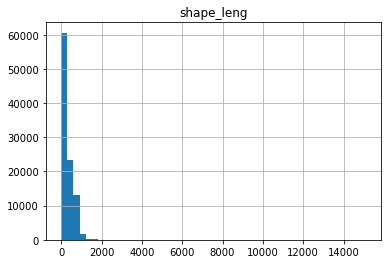

In [20]:
streets_clipped[['shape_leng']].hist(bins=50)

In [21]:
streets_clipped.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 99245 entries, 75382 to 13667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   physicalid    99245 non-null  object  
 1   st_label      99245 non-null  object  
 2   st_name       99245 non-null  object  
 3   full_stree    99245 non-null  object  
 4   rw_type       99245 non-null  object  
 5   rw_type_name  99245 non-null  object  
 6   st_width      99245 non-null  object  
 7   frm_lvl_co    99245 non-null  object  
 8   to_lvl_co     99245 non-null  object  
 9   borocode      99245 non-null  object  
 10  shape_leng    99245 non-null  float64 
 11  geometry      99245 non-null  geometry
dtypes: float64(1), geometry(1), object(10)
memory usage: 9.8+ MB


In [22]:
streets_clipped.shape

(99245, 12)

In [23]:
streets_clipped.to_file("data/streets-clipped.json", driver="GeoJSON")

In [24]:
path = 'data/streets-clipped.json'
streets = gpd.read_file(path)

print(streets.shape)
streets.head()

(99245, 12)


,physicalid,st_label,st_name,full_stree,rw_type,rw_type_name,st_width,frm_lvl_co,to_lvl_co,borocode,shape_leng,geometry
0,83959,RUSHMORE AVE,RUSHMORE,RUSHMORE AVE,1,Street,26.0,13,13,4,241.721157,"LINESTRING (1056250.881 217574.084, 1056464.75..."
1,30039,MARATHON PKWY,MARATHON,MARATHON PKWY,1,Street,48.0,13,13,4,262.719050,"LINESTRING (1057690.803 217767.541, 1057841.20..."
2,81484,HORACE HARDING EXPY,HORACE HARDING,HORACE HARDING EXPY,1,Street,30.0,13,13,4,287.524656,"LINESTRING (1060434.755 217630.556, 1060713.78..."
3,99301,DEEPDALE AVE,DEEPDALE,DEEPDALE AVE,1,Street,30.0,13,13,4,245.452819,"LINESTRING (1056779.744 217614.986, 1057000.82..."
4,83520,248 ST,248,248 ST,1,Street,30.0,13,13,4,39.921664,"LINESTRING (1057000.826 217721.617, 1057017.04..."
